<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TO-DO:" data-toc-modified-id="TO-DO:-1">TO-DO:</a></span><ul class="toc-item"><li><span><a href="#Derived" data-toc-modified-id="Derived-1.1">Derived</a></span></li></ul></li><li><span><a href="#Chapter-1---Motivating-Problems-and-Systems" data-toc-modified-id="Chapter-1---Motivating-Problems-and-Systems-2">Chapter 1 - Motivating Problems and Systems</a></span><ul class="toc-item"><li><span><a href="#1.2-Averaging-algorithms-in-wireless-sensor-networks" data-toc-modified-id="1.2-Averaging-algorithms-in-wireless-sensor-networks-2.1">1.2 Averaging algorithms in wireless sensor networks</a></span><ul class="toc-item"><li><span><a href="#Create-the-Graph-and-define-$A$" data-toc-modified-id="Create-the-Graph-and-define-$A$-2.1.1">Create the Graph and define $A$</a></span></li><li><span><a href="#Simulate-and-visualize-Process" data-toc-modified-id="Simulate-and-visualize-Process-2.1.2">Simulate and visualize Process</a></span></li><li><span><a href="#Interactive-network-presentation" data-toc-modified-id="Interactive-network-presentation-2.1.3">Interactive network presentation</a></span></li></ul></li></ul></li></ul></div>

# TO-DO:

- 4 simple dynamics (averaging vs flow, discrete vs continuous time)
- bug dynamics (visualizing motion on circle) in appendix --> - Exersice 1.5 and section 1.6, see existing
- robot dynamics in E1.6 --> Take a look at what Allan did!
- Outsource functions

## Derived

- 1.2 Wireless System Example
- 1.3 continuous-time averaging system: Flocking Dynamics Example
- 1.4 Discrete and continuous time flowing system example
- bug dynamics
- robot dynamics


In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# For interactive graphs
%matplotlib notebook

from ipywidgets import interact

# Settings
custom_figsize = (6, 4)

# Check package version
# from importlib.metadata import version
# import sys
# print('Your package Versions are displayed below, script might not work if versions do not align, see requirements.txt:')
# print('Python: ', sys.version)
# print('Numpy: ', version('numpy'))
# print('Matplotlib: ', version('matplotlib'))
# print('Networkx: ', version('networkx'))

# Chapter 1 - Motivating Problems and Systems
**TBD** - General Text about what this is, license, interactive, instructions to run every cell

Credits to who

Outsourcing function

## 1.2 Averaging algorithms in wireless sensor networks

Example from Chapter 1.2 for discrete averaging network dynamics with wireless sensor network, enhanced examples will occur in Chapter 4, this is an introductory example. 

Execute next cell to create the example graph.

### Create the Graph and define $A$

Note: In Chapter 5 we will introduce an elegant algorithm do define the weights as in this example, the equal-neighbour-model.

<IPython.core.display.Javascript object>


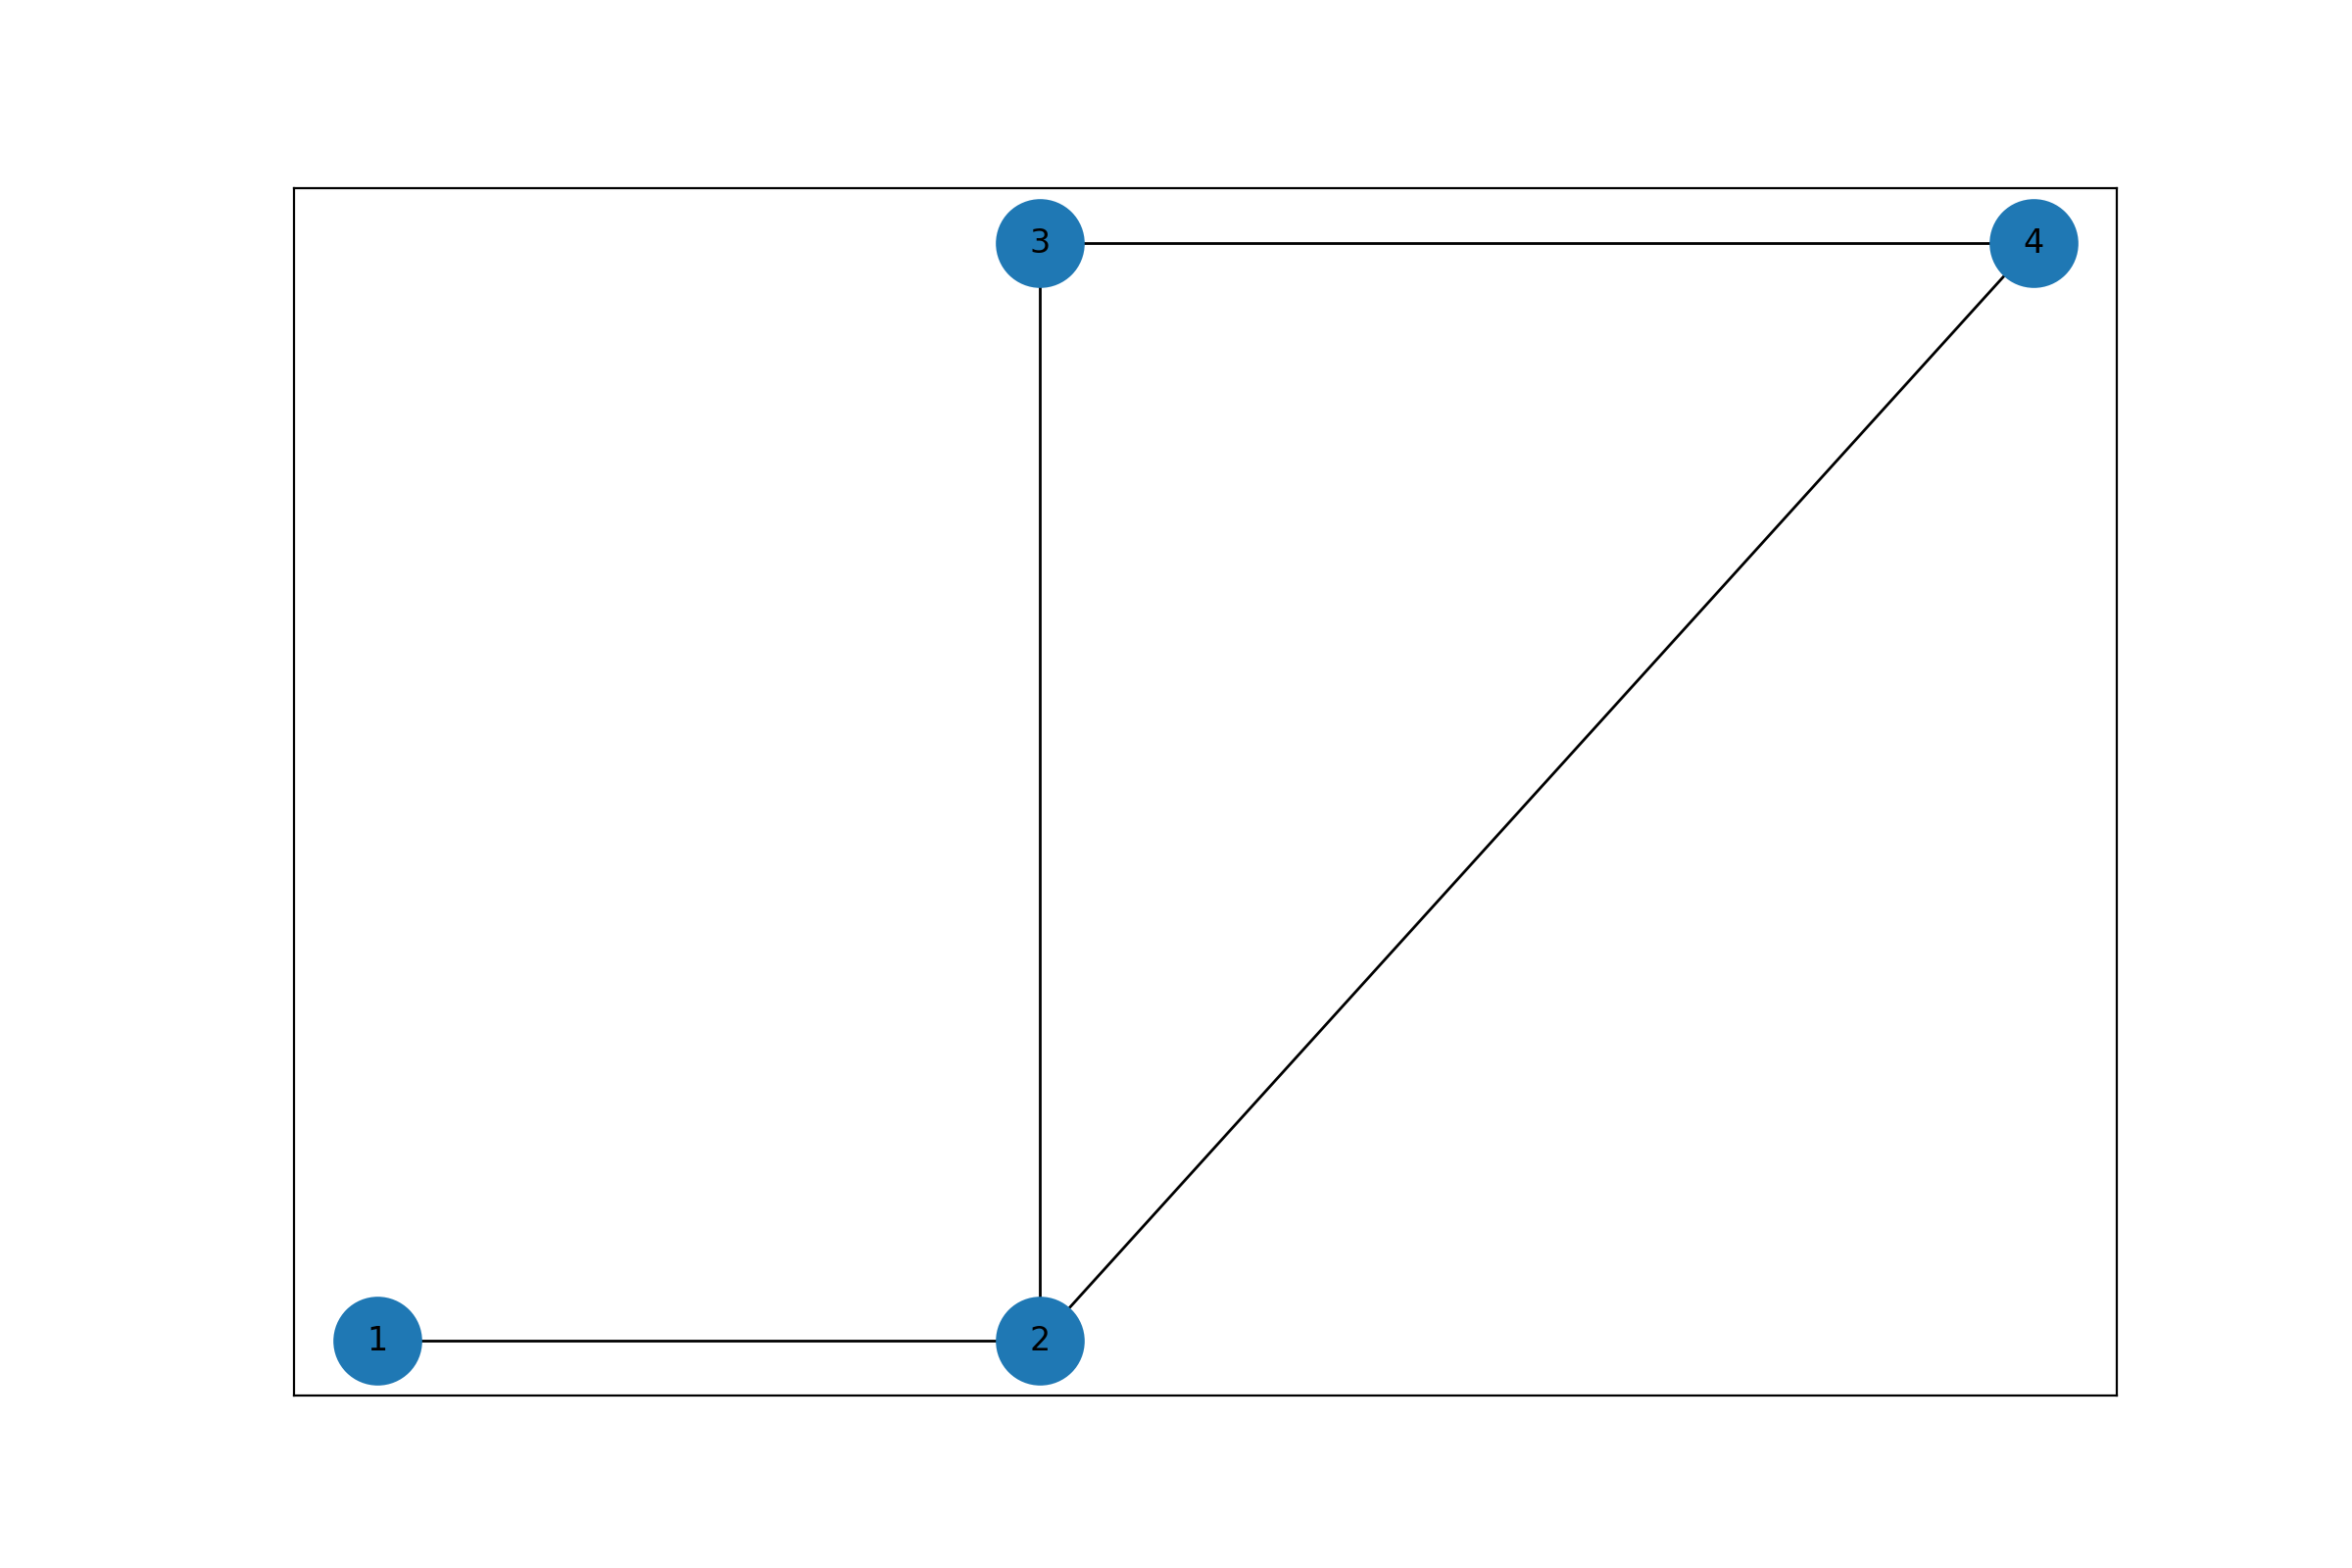

A matrix: 
 [[0.5        0.5        0.         0.        ]
 [0.25       0.25       0.25       0.25      ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.33333333 0.33333333 0.33333333]]


In [2]:
# Creating the Network System example as in Chapter 1.2
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(2,4)

pos = {1:[0.2,0.2],2:[.4,.2],3:[.4,.6],4:[.7,.6]}

A = np.array([[0.5,0.5, 0., 0.],
              [1/4, 1/4, 1/4, 1/4],
              [0., 1/3, 1/3, 1/3],
              [0., 1/3, 1/3, 1/3]
])

fig, ax1 = plt.subplots(figsize = custom_figsize)
nx.draw_networkx(G, pos, node_size=1000, ax = ax1)

print("A matrix: \n", A)

### Simulate and visualize Process

Note: Discrete-time linear system $x(k+1) = A x(k)$, $x(0)=x_0$ or, equivalently $x(k) = A^k x_0$

We plot our simulation with the initial average as dashed-line to show, that we do not reach average-consensus (more on that in Chapter 5)

<IPython.core.display.Javascript object>


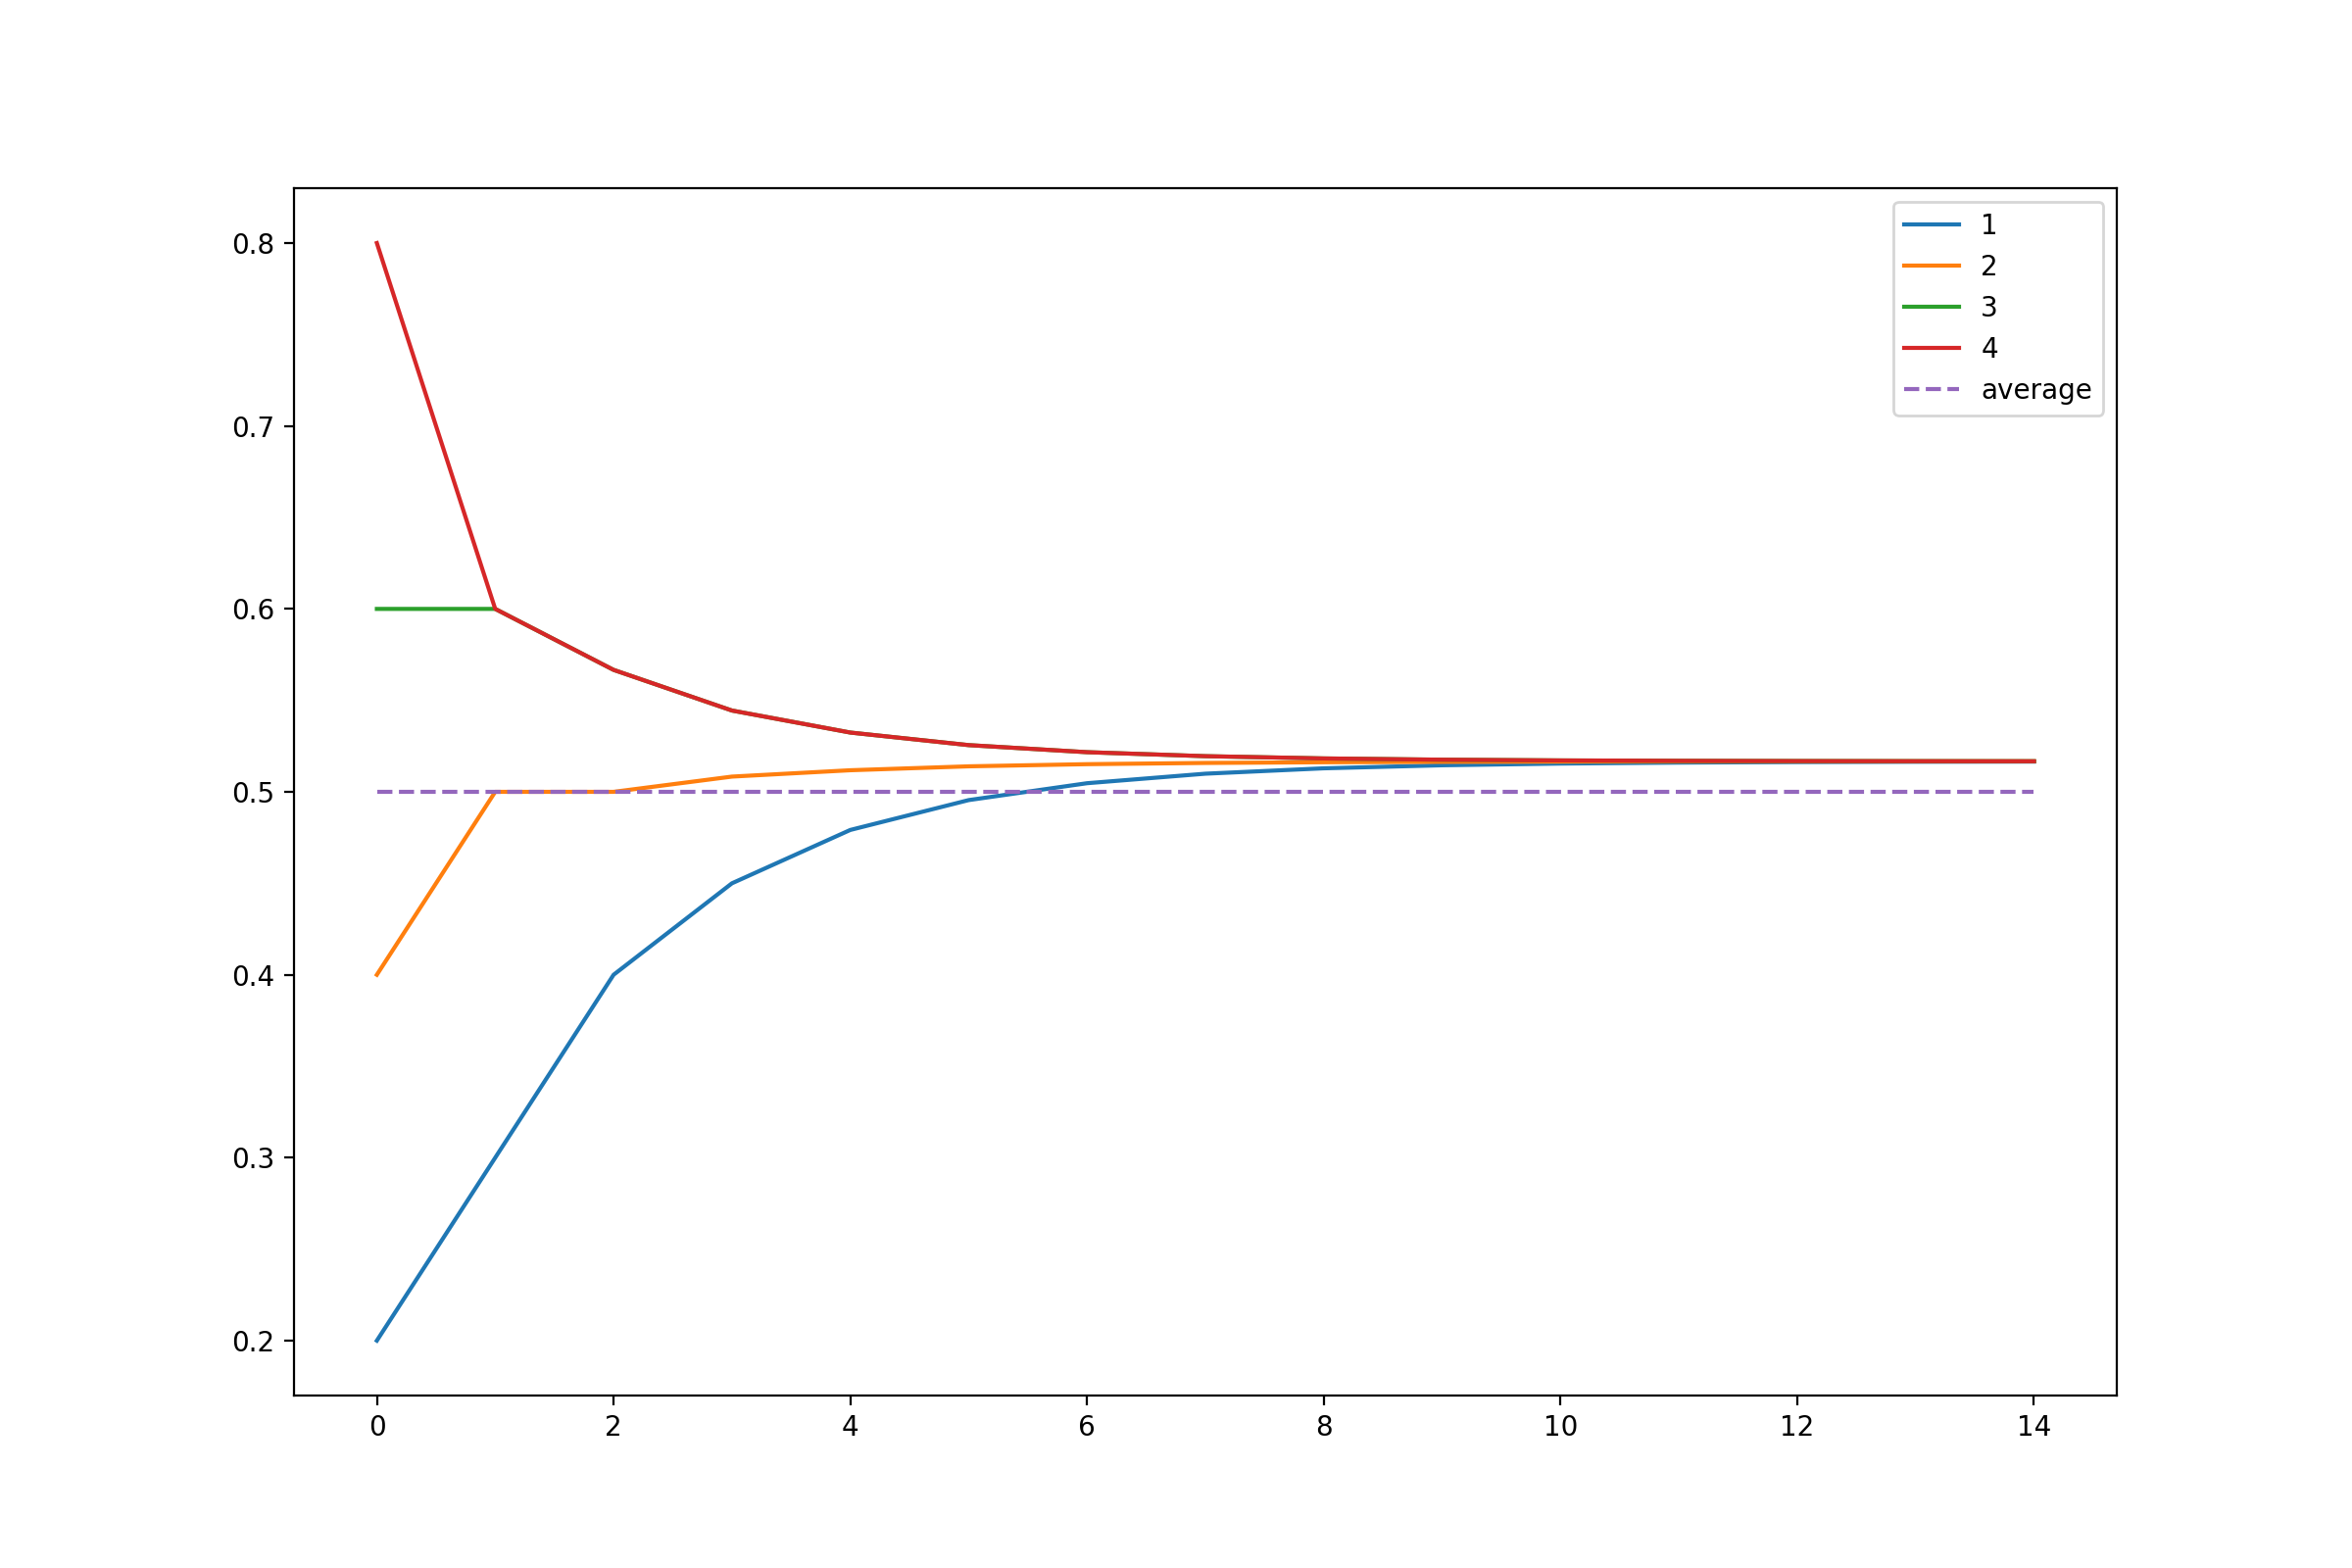

In [3]:
# Initialize random state vector or define your own one
#x_0 = np.random.rand(4)
x_0 = np.array([0.2, 0.4, 0.6, 0.8])
# Choosing the range of time step
t = 15

# Simulating our network and saving the state for each time step
def simulate_network(A, x_0, t):
    """
    Function to simulate the network and save the state
    """
    states = np.zeros((t,A.shape[0]))
    states[0,:]=x_0
    for i in range(1,t):
        states[i,:] = A @ states[i-1,:]
    return states

def plot_node_val_2D(states, t, ax, legend=True):
    """
    Function to plot the states on a 2d-axis
    """
    x_axis = np.arange(t)
    for i in range(states.shape[1]):
        ax.plot(x_axis, states[:,i], label=str(i+1))
    average = np.ones(t) * np.sum(x_0)/states.shape[1]
    ax.plot(x_axis, average, '--', label='average')
    if legend:
        ax.legend()

# Initialize figure
fig, ax2 = plt.subplots(figsize=custom_figsize)

states = simulate_network(A,x_0, t)
plot_node_val_2D(states, t, ax2)

### Interactive network presentation
Below you can find an interactive network simulation, where you can use the slide bar to visualize all values at each node for each time step.

In [4]:
import matplotlib as mpl

def init_network_sim_plot(G, states, ax, vbound=None, pos=None):
    """
    Function to initialize Network:
        - Setting up the figure with colorbar
        - Determine position of Nodes and boundaries for values

    Parameters
    ----------
    G : nx.graph
        Graph that will be displayed
    states: np.array
        Values of nodes through the simulation
    ax: plt.axes
        Previously defined axis handle
    vbound:
        Value boundaries for the coloring
    pos : np.array
        Position of nodes if already provided for plot

    Returns
    -------
    ax
        axes where the graph can be plotted on
    vbound
        Boundary values that should be used from now on
    pos
        position of the node for the graph plot
    """

    if pos is None:
        pos = nx.drawing.layout.spring_layout(G)
    if vbound is None:
        vmax_s = np.amax(states)
        vmin_s = np.amin(states)
    else:
        vmax_s = vbound[1]
        vmin_s = vbound[0]
    norm = mpl.colors.Normalize(vmin=vmin_s,vmax=vmax_s)
    cmap = plt.get_cmap('viridis')
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm)
    return ax, [vmin_s, vmax_s], pos

    
def update_network(i, G, states_m, ax, vbound, pos):
    """
    Function to plot and visualize the state values in a graph

    Parameters
    ----------
    i: int
        timestep
    G : nx.graph
        Graph that will be displayed
    states: np.array
        Values of nodes through the simulation
    ax: plt.axes
        Previously defined axis handle
    vbound:
        Value boundaries for the coloring
    pos : np.array
        Position of nodes if already provided for plot

    Returns
    -------
    None
    """
    ax.clear() # Clear axes
    colors = states_m[i]
    cmap = plt.get_cmap('viridis')
    # draw with new color map
    nx.draw_networkx(G, pos, node_size=1000, cmap=cmap,
                     node_color=colors, vmin=vbound[0], vmax=vbound[1], ax=ax)  
    
    # From here: Add actual state value as label
    pos_higher = {}
    x_off = 0.00  # offset on the x axis
    y_off = 0.03  # offset on the y axis
    for k, v in pos.items():
        pos_higher[k] = (v[0]+x_off, v[1]+y_off)
    labels = ["%.4g" % num for num in states[i]] # Casting node value to string
    labels = dict(zip(list(range(1, len(labels)+1)), labels)) # Matching node value to node number in a dict
    nx.draw_networkx_labels(G, pos_higher, labels, ax=ax)

*Note: Executing this cell twice can lead to an error in, restart Kernel if necessary*

<IPython.core.display.Javascript object>


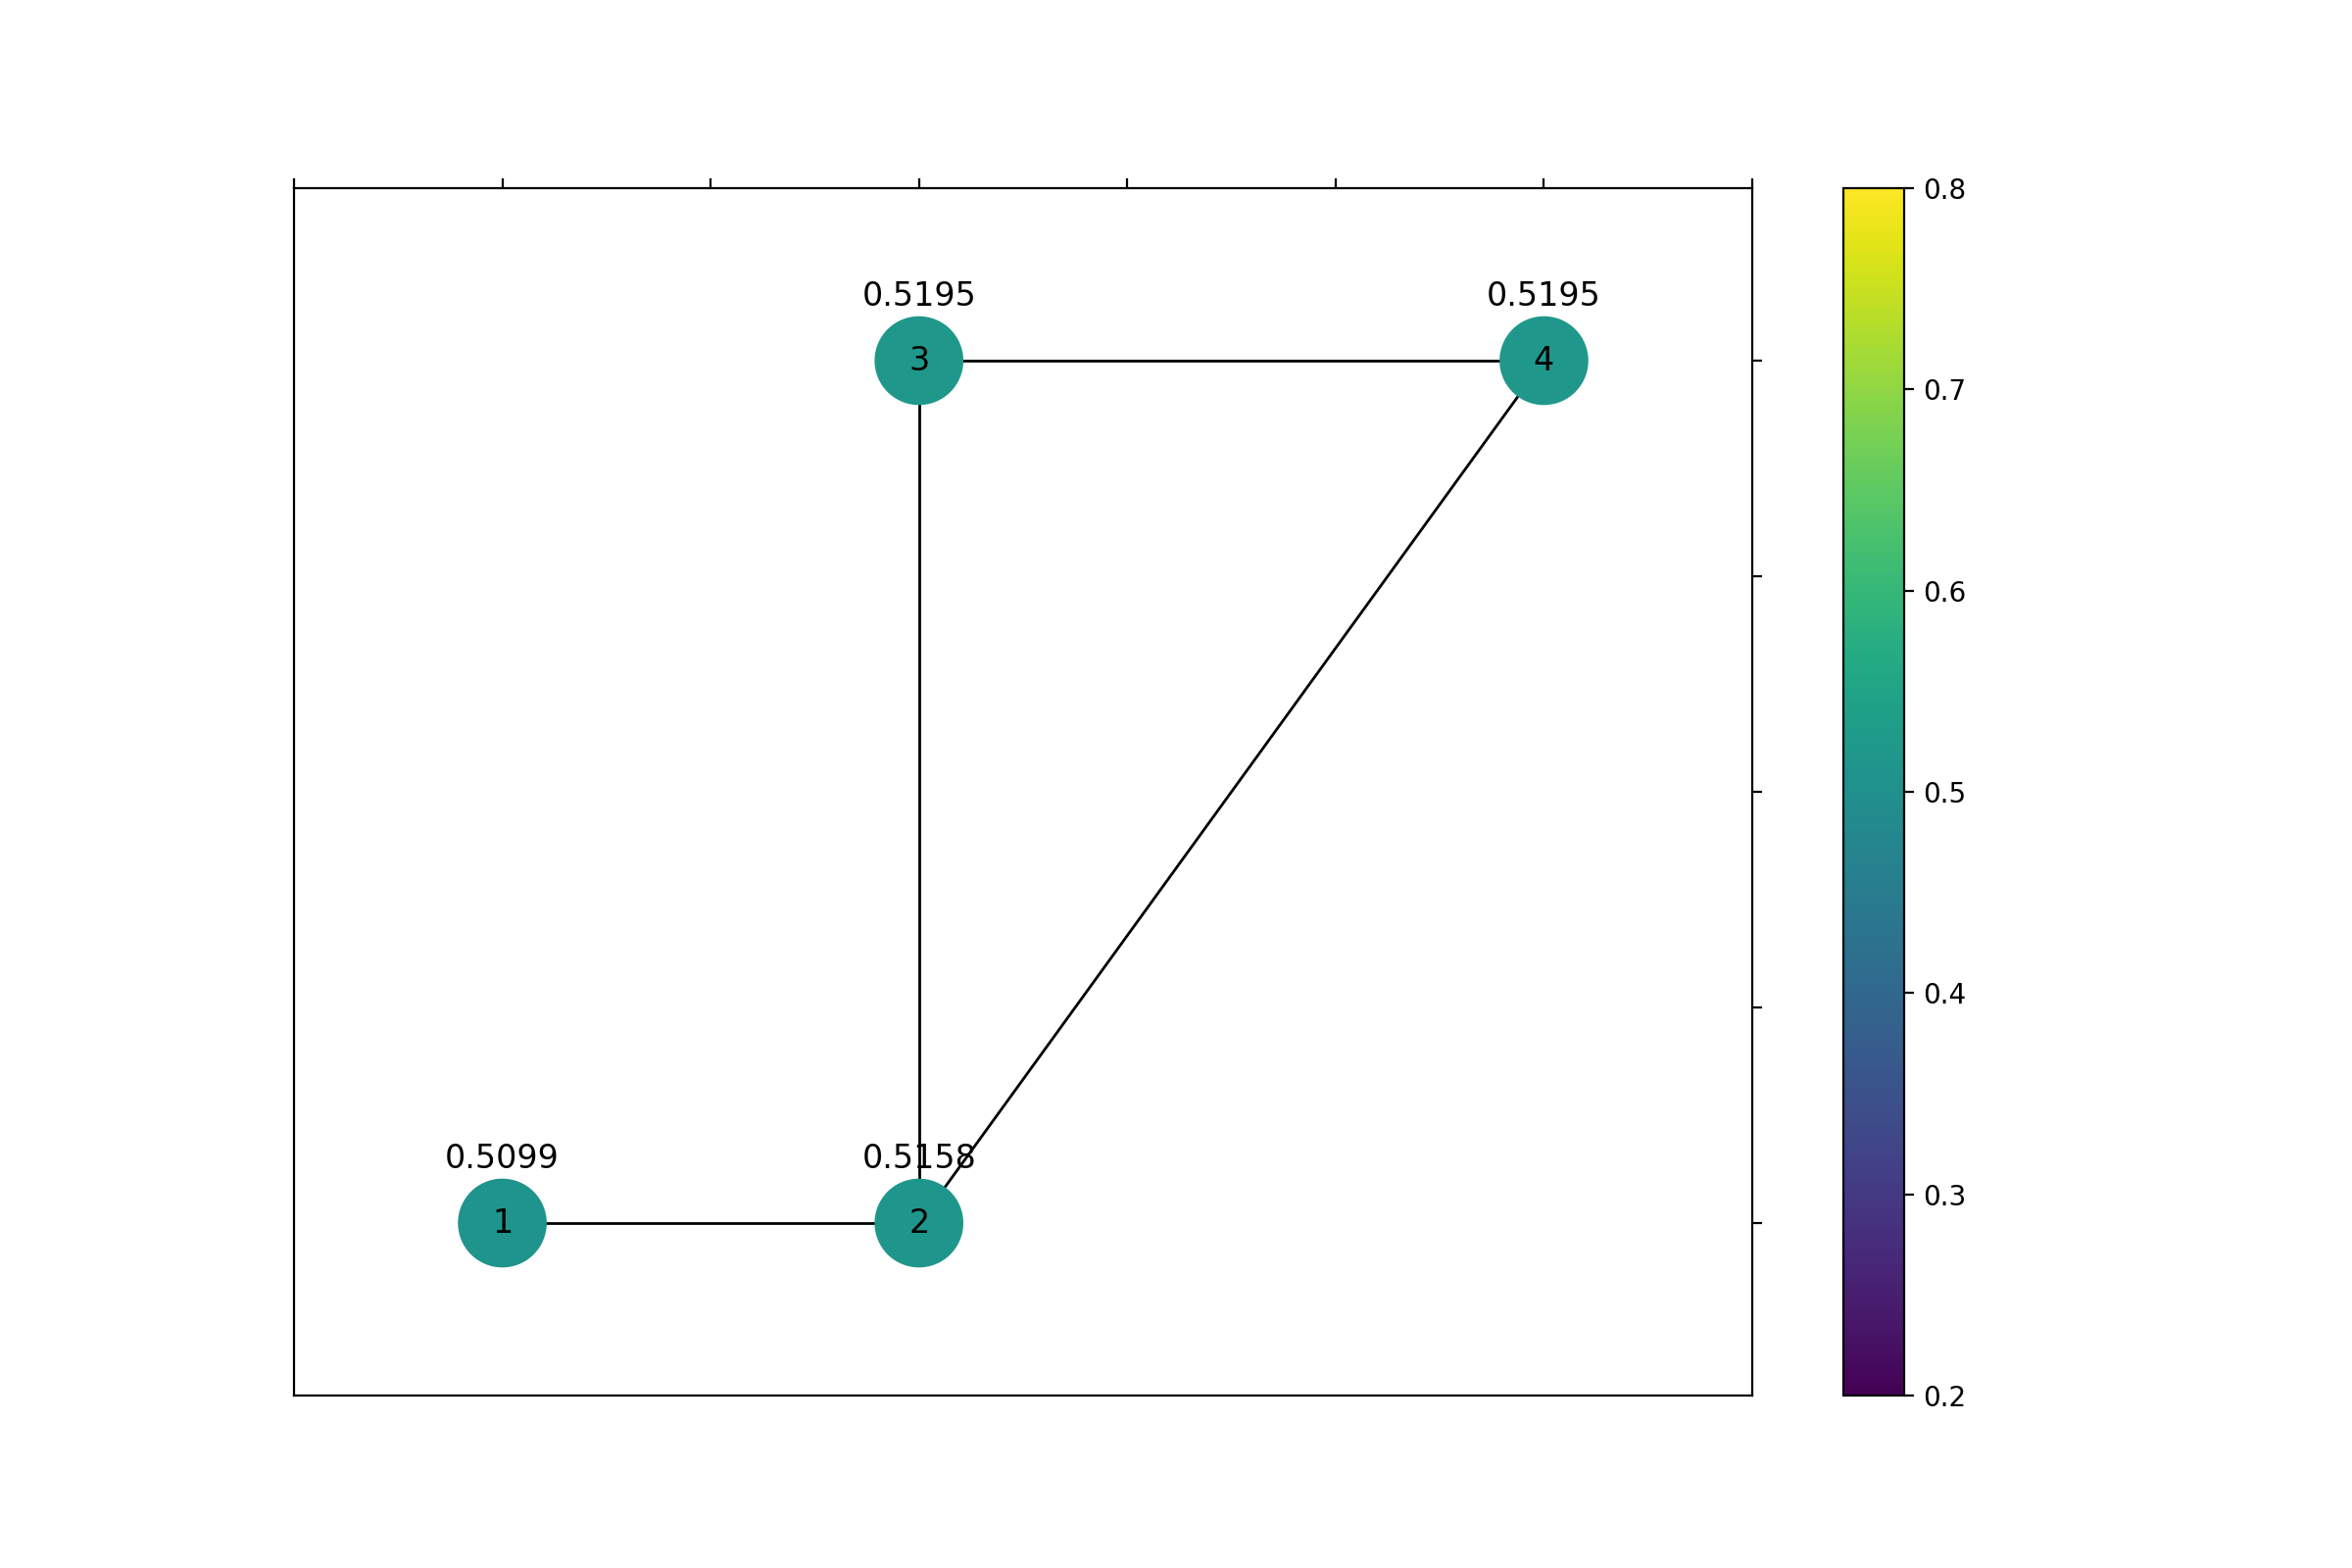

interactive(children=(IntSlider(value=7, description='timestep', max=14), Output()), _dom_classes=('widget-int…

In [5]:
fig, ax3 = plt.subplots(figsize=custom_figsize)
ax3, v_bound, pos = init_network_sim_plot(G, states, ax3, pos=pos)

@interact(timestep=(0, t-1))
def inter(timestep):
    update_network(timestep, G=G, states_m=states, ax=ax3, vbound=v_bound, pos=pos)
    ax3.margins(0.20) # Zooming out for better visualization
    return None